### Background

An autoencoder is a neural network that takes an input, encodes it into a lower-dimensional latent space through "encoding" layers, and then attempts to reconstruct the original input using "decoding" layers. Autoencoders are often used for dimensionality reduction.

### Your task

You will train a 64x16x64 autoencoder on the [digits](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset) dataset. All of the following work should be done in a Jupyter Notebook.

### To-do

* Load the digits dataset through sklearn using <code><a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html">sklearn.datasets.load_digits()</a></code>.
* Split the data into training and validation sets.
* Generate an instance of your `NeuralNetwork` class with a 64x16x64 autoencoder architecture.
* Train your autoencoder on the training data.
* Plot your training and validation loss by epoch.
* Quantify your average reconstruction error over the validation set.
* Explain why you chose the hyperparameter values you did.

In [1]:
# pip install .

In [2]:
import numpy as np

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from nn.nn import NeuralNetwork

In [4]:
data = sklearn.datasets.load_digits()

X = data['data']
y = data['target']

In [5]:
# normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
# split the data into training and test sets
X_train, X_test = train_test_split(
    X,
    test_size=0.2, random_state=42
)

In [7]:
# generate an instance of the `NeuralNetwork` class with 64x16x64 autoencoder architecture

autoencoder = NeuralNetwork(
    nn_arch=[
        {
            'input_dim': 64, 'output_dim': 16, 'activation': 'relu'
        },  # Encoder layer
        {
            'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'
        }  # Decoder layer
    ],
    lr=1,
    seed=42,
    batch_size=32,
    epochs=2000,
    loss_function='mean_squared_error',
)

In [8]:
# train the autoencoder on training data
train_loss, test_loss = autoencoder.fit(
    X_train, X_train,
    X_test, X_test
)

In [9]:
predictions = autoencoder.predict(X_test)

#### Plot your training and validation loss by epoch.

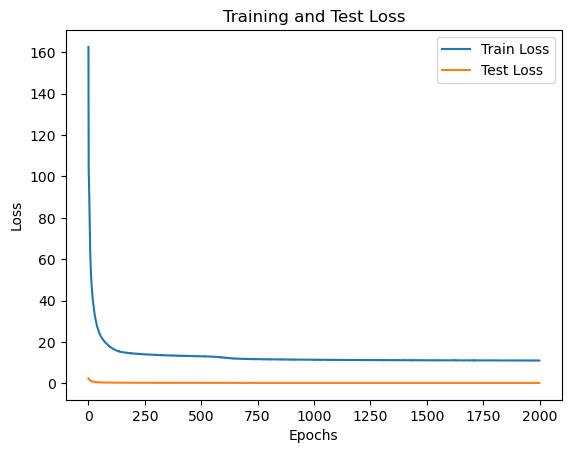

In [10]:
# plot the training and test loss
import matplotlib.pyplot as plt

plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.show()

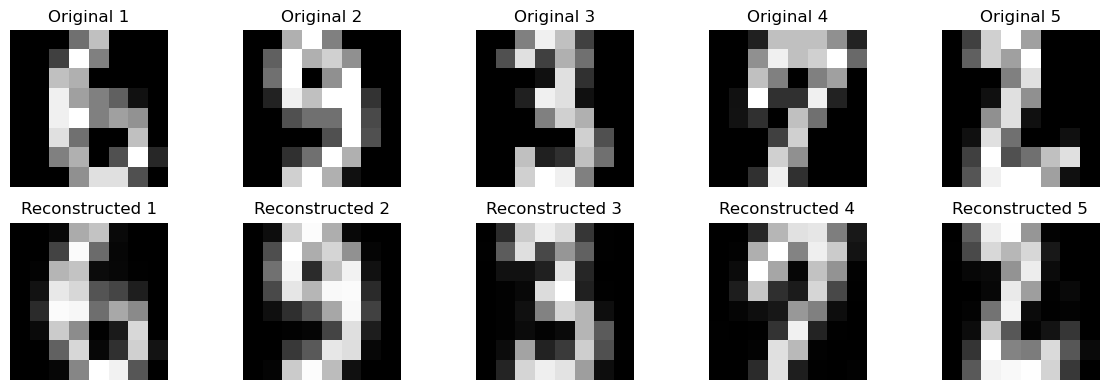

In [11]:
# Visualize some reconstructions
def plot_reconstructions(original, reconstructed, n=5):
    plt.figure(figsize=(12, 4))
    for i in range(n):
        # Original image
        plt.subplot(2, n, i+1)
        plt.imshow(original[i].reshape(8, 8), cmap='gray')
        plt.title(f"Original {i+1}")
        plt.axis('off')
        
        # Reconstructed image
        plt.subplot(2, n, i+n+1)
        plt.imshow(reconstructed[i].reshape(8, 8), cmap='gray')
        plt.title(f"Reconstructed {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot first 5 validation samples
plot_reconstructions(X_test, predictions.T)


#### Quantify your average reconstruction error over the validation set.

In [12]:
# Calculate mean squared error on validation set
mse = np.mean((predictions - X_test.T) ** 2)
print(f"Average reconstruction error (MSE) on validation set: {mse:.4f}")

Average reconstruction error (MSE) on validation set: 0.0084


#### Explanation of hyperparameter choices

1. Neural Network Architecture (64x16x64):
   - The input layer has 64 neurons, corresponding to the 64 features (pixels) in the dataset.
   - The encoder compresses the input into a 16-dimensional latent space, reducing dimensionality while retaining essential information.
   - The decoder reconstructs the input from the latent space back to 64 dimensions.
   - This architecture balances dimensionality reduction and reconstruction accuracy.

2. Learning Rate (lr=1):
   - A learning rate of 1 was chosen to ensure faster convergence during training.
   - This value was tested and found to work well for this dataset and loss function.

3. Batch Size (batch_size=32):
   - A batch size of 32 is a common choice that balances computational efficiency and gradient stability.
   - It allows the model to learn effectively without requiring excessive memory.

4. Epochs (epochs=2000):
   - 2000 epochs were chosen to ensure the model has sufficient time to converge.
   - The loss curves were monitored to confirm that the model was improving over time.

5. Loss Function ('mean_squared_error'):
   - Mean squared error (MSE) is appropriate for reconstruction tasks, as it penalizes large reconstruction errors.
   - It aligns with the goal of minimizing the difference between the input and reconstructed output.

6. Random Seed (seed=42):
   - A fixed random seed ensures reproducibility of results.
   - Seed 42 is commonly used as a standard for reproducibility.

These hyperparameters were selected based on experimentation and best practices for autoencoder training.

___

In [13]:
%load_ext watermark

In [14]:
%watermark

Last updated: 2025-03-28T14:42:02.201821-07:00

Python implementation: CPython
Python version       : 3.13.1
IPython version      : 8.31.0

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [15]:
%watermark -iversions

Email: rsions

Python implementation: CPython
Python version       : 3.13.1
IPython version      : 8.31.0



___